In [1]:
#
# librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
import seaborn as sns
import cv2
import tensorflow as tf

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier, KerasRegressor
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.optimizers import Adam, SGD
from scipy.stats import norm

from tensorflow.keras import regularizers
from keras.regularizers import l1
from tensorflow.keras.layers import Dropout
#from keras.layers.normalization import BatchNormalization

import keras

SEED = 42
keras.utils.set_random_seed(SEED)





In [2]:
# directorios
path = os.getcwd()
path_data = os.path.join(path, 'data')
path_data_train = os.path.join(path_data, 'train_data.csv')
path_data_test = os.path.join(path_data, 'test_data.csv')
images_path = os.path.join(path, 'imgs')




In [3]:
train_set = pd.read_csv(path_data_train)

test_set = pd.read_csv(path_data_test)



In [4]:
train_set

,ID,date,zipcode,lat,long,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
0,143,20140515T000000,98003,47.2857,-122.300,3.0,2.25,1590.0,7748.0,2.0,...,0.0,4.0,7.0,1590.0,0.0,1991.0,0.0,1590.0,7606.0,263000.0
1,1175,20141203T000000,98117,47.6885,-122.380,3.0,NaN,2040.0,4005.0,NaN,...,0.0,4.0,8.0,1740.0,300.0,1930.0,0.0,1380.0,4005.0,620000.0
2,221,20140711T000000,98106,47.5150,-122.359,2.0,1.00,640.0,7768.0,1.0,...,0.0,3.0,6.0,640.0,0.0,1942.0,0.0,NaN,7424.0,165000.0
3,1231,20141117T000000,98144,47.5758,-122.309,2.0,1.50,1240.0,NaN,NaN,...,0.0,NaN,8.0,1080.0,160.0,NaN,0.0,1530.0,1209.0,403000.0
4,509,20150402T000000,98038,47.3531,-122.017,3.0,NaN,1990.0,NaN,2.0,...,NaN,3.0,7.0,1990.0,0.0,2010.0,0.0,2580.0,3800.0,318200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,954,20150423T000000,98014,47.6820,-121.913,3.0,2.50,3230.0,129578.0,1.0,...,0.0,NaN,NaN,2100.0,1130.0,NaN,0.0,2760.0,62059.0,499950.0
1272,104,20150507T000000,98103,47.6857,-122.353,4.0,1.50,NaN,4000.0,1.5,...,2.0,NaN,7.0,1580.0,NaN,1920.0,1990.0,1160.0,4000.0,750000.0
1273,138,20140911T000000,98003,47.2827,-122.302,3.0,NaN,NaN,6600.0,NaN,...,NaN,3.0,7.0,1610.0,0.0,NaN,0.0,1660.0,NaN,250000.0
1274,1529,20140509T000000,98075,47.5884,-122.086,3.0,2.25,3000.0,11665.0,1.5,...,4.0,3.0,11.0,3000.0,0.0,2001.0,0.0,3000.0,15959.0,2400000.0


In [5]:
test_set

,ID,date,zipcode,lat,long,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,1473,20150421T000000,98006,47.5544,-122.147,NaN,4.50,4490.0,24767.0,2.0,0.0,2.0,3.0,NaN,3800.0,690.0,1998.0,0.0,3370.0,32700.0
1,716,20141029T000000,98030,47.3573,-122.200,3.0,NaN,1730.0,6007.0,NaN,0.0,0.0,NaN,8.0,NaN,0.0,NaN,0.0,2000.0,6245.0
2,1360,20141217T000000,98074,47.6085,-122.013,4.0,2.50,3720.0,8633.0,2.0,0.0,0.0,3.0,10.0,3720.0,0.0,1999.0,NaN,3515.0,9660.0
3,1522,20140715T000000,98027,47.4913,-122.081,4.0,2.50,2550.0,NaN,2.0,0.0,0.0,3.0,9.0,2550.0,0.0,2001.0,0.0,1870.0,56628.0
4,1570,20140825T000000,98146,47.4982,-122.362,1.0,0.75,480.0,9750.0,1.0,0.0,0.0,NaN,4.0,480.0,0.0,1948.0,0.0,1550.0,9924.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,1475,20141222T000000,98105,47.6706,-122.265,3.0,1.00,1710.0,NaN,1.0,0.0,0.0,3.0,7.0,1410.0,300.0,1946.0,0.0,1610.0,NaN
316,374,20140627T000000,98014,47.6622,-121.961,4.0,2.50,2770.0,63118.0,NaN,0.0,0.0,3.0,9.0,2770.0,0.0,1997.0,0.0,NaN,44224.0
317,795,20141205T000000,98077,47.7754,-122.032,3.0,NaN,NaN,219978.0,2.0,0.0,0.0,3.0,8.0,2130.0,0.0,NaN,0.0,3340.0,217800.0
318,888,20150331T000000,98056,47.4944,-122.165,3.0,1.00,960.0,5512.0,1.0,0.0,0.0,4.0,6.0,960.0,0.0,NaN,0.0,1090.0,5837.0


In [6]:
import datetime
def date(df):
    for j,i in enumerate(df):
        parsed_date = datetime.datetime.strptime(i, "%Y%m%dT%H%M%S")
        dic={'year':int(parsed_date.year),'month':int(parsed_date.month),'day': int(parsed_date.day)}
        sd=pd.DataFrame(dic,index=[j])
        
        if j==0:
            SDd=sd
        else:
            SDd=pd.concat([SDd,sd],axis=0)
    
    return SDd  

fech=date(train_set['date'])
fech

,year,month,day
0,2014,5,15
1,2014,12,3
2,2014,7,11
3,2014,11,17
4,2015,4,2
...,...,...,...
1271,2015,4,23
1272,2015,5,7
1273,2014,9,11
1274,2014,5,9


In [7]:
def preprocess_time(df, column, period):
    df['sin_'+column] = np.sin(2 * np.pi * df[column] / period)
    df['cos_'+column] = np.cos(2 * np.pi * df[column] / period)
    #df.drop([column], axis=1, inplace=True)
    return df

def fecha(d,t):
    c=fech
    e = preprocess_time(c, d, t)
    e.head()
    # Mostrar la transformación aplicada
    #fig = plt.figure(figsize=(8, 6))
    #sns.scatterplot(data=e, x="sin_"+d, y="cos_"+d).set_title("Encoding utilizado con" + d)
    #plt.show()
    return e


In [8]:
e=fecha('day',31)
e=fecha('month',12)
e

,year,month,day,sin_day,cos_day,sin_month,cos_month
0,2014,5,15,0.101168,-0.994869,5.000000e-01,-8.660254e-01
1,2014,12,3,0.571268,0.820763,-2.449294e-16,1.000000e+00
2,2014,7,11,0.790776,-0.612106,-5.000000e-01,-8.660254e-01
3,2014,11,17,-0.299363,-0.954139,-5.000000e-01,8.660254e-01
4,2015,4,2,0.394356,0.918958,8.660254e-01,-5.000000e-01
...,...,...,...,...,...,...,...
1271,2015,4,23,-0.998717,-0.050649,8.660254e-01,-5.000000e-01
1272,2015,5,7,0.988468,0.151428,5.000000e-01,-8.660254e-01
1273,2014,9,11,0.790776,-0.612106,-1.000000e+00,-1.836970e-16
1274,2014,5,9,0.968077,-0.250653,5.000000e-01,-8.660254e-01


In [9]:
e=e.drop('month',axis=1);e=e.drop('day',axis=1)
train_set=pd.concat([train_set,e],axis=1)
train_set=train_set.drop('date',axis=1)
train_set

,ID,zipcode,lat,long,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,yr_built,yr_renovated,sqft_living15,sqft_lot15,price,year,sin_day,cos_day,sin_month,cos_month
0,143,98003,47.2857,-122.300,3.0,2.25,1590.0,7748.0,2.0,0.0,...,1991.0,0.0,1590.0,7606.0,263000.0,2014,0.101168,-0.994869,5.000000e-01,-8.660254e-01
1,1175,98117,47.6885,-122.380,3.0,NaN,2040.0,4005.0,NaN,0.0,...,1930.0,0.0,1380.0,4005.0,620000.0,2014,0.571268,0.820763,-2.449294e-16,1.000000e+00
2,221,98106,47.5150,-122.359,2.0,1.00,640.0,7768.0,1.0,0.0,...,1942.0,0.0,NaN,7424.0,165000.0,2014,0.790776,-0.612106,-5.000000e-01,-8.660254e-01
3,1231,98144,47.5758,-122.309,2.0,1.50,1240.0,NaN,NaN,0.0,...,NaN,0.0,1530.0,1209.0,403000.0,2014,-0.299363,-0.954139,-5.000000e-01,8.660254e-01
4,509,98038,47.3531,-122.017,3.0,NaN,1990.0,NaN,2.0,0.0,...,2010.0,0.0,2580.0,3800.0,318200.0,2015,0.394356,0.918958,8.660254e-01,-5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,954,98014,47.6820,-121.913,3.0,2.50,3230.0,129578.0,1.0,0.0,...,NaN,0.0,2760.0,62059.0,499950.0,2015,-0.998717,-0.050649,8.660254e-01,-5.000000e-01
1272,104,98103,47.6857,-122.353,4.0,1.50,NaN,4000.0,1.5,NaN,...,1920.0,1990.0,1160.0,4000.0,750000.0,2015,0.988468,0.151428,5.000000e-01,-8.660254e-01
1273,138,98003,47.2827,-122.302,3.0,NaN,NaN,6600.0,NaN,0.0,...,NaN,0.0,1660.0,NaN,250000.0,2014,0.790776,-0.612106,-1.000000e+00,-1.836970e-16
1274,1529,98075,47.5884,-122.086,3.0,2.25,3000.0,11665.0,1.5,1.0,...,2001.0,0.0,3000.0,15959.0,2400000.0,2014,0.968077,-0.250653,5.000000e-01,-8.660254e-01


In [10]:
test_set

,ID,date,zipcode,lat,long,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,1473,20150421T000000,98006,47.5544,-122.147,NaN,4.50,4490.0,24767.0,2.0,0.0,2.0,3.0,NaN,3800.0,690.0,1998.0,0.0,3370.0,32700.0
1,716,20141029T000000,98030,47.3573,-122.200,3.0,NaN,1730.0,6007.0,NaN,0.0,0.0,NaN,8.0,NaN,0.0,NaN,0.0,2000.0,6245.0
2,1360,20141217T000000,98074,47.6085,-122.013,4.0,2.50,3720.0,8633.0,2.0,0.0,0.0,3.0,10.0,3720.0,0.0,1999.0,NaN,3515.0,9660.0
3,1522,20140715T000000,98027,47.4913,-122.081,4.0,2.50,2550.0,NaN,2.0,0.0,0.0,3.0,9.0,2550.0,0.0,2001.0,0.0,1870.0,56628.0
4,1570,20140825T000000,98146,47.4982,-122.362,1.0,0.75,480.0,9750.0,1.0,0.0,0.0,NaN,4.0,480.0,0.0,1948.0,0.0,1550.0,9924.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,1475,20141222T000000,98105,47.6706,-122.265,3.0,1.00,1710.0,NaN,1.0,0.0,0.0,3.0,7.0,1410.0,300.0,1946.0,0.0,1610.0,NaN
316,374,20140627T000000,98014,47.6622,-121.961,4.0,2.50,2770.0,63118.0,NaN,0.0,0.0,3.0,9.0,2770.0,0.0,1997.0,0.0,NaN,44224.0
317,795,20141205T000000,98077,47.7754,-122.032,3.0,NaN,NaN,219978.0,2.0,0.0,0.0,3.0,8.0,2130.0,0.0,NaN,0.0,3340.0,217800.0
318,888,20150331T000000,98056,47.4944,-122.165,3.0,1.00,960.0,5512.0,1.0,0.0,0.0,4.0,6.0,960.0,0.0,NaN,0.0,1090.0,5837.0


In [11]:
fech=date(test_set['date'])
e=fecha('day',31)
e=fecha('month',12)
e=e.drop('month',axis=1);e=e.drop('day',axis=1)
test_set=pd.concat([test_set,e],axis=1)
test_set=test_set.drop('date',axis=1)
test_set

,ID,zipcode,lat,long,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,year,sin_day,cos_day,sin_month,cos_month
0,1473,98006,47.5544,-122.147,NaN,4.50,4490.0,24767.0,2.0,0.0,...,690.0,1998.0,0.0,3370.0,32700.0,2015,-8.978045e-01,-0.440394,8.660254e-01,-5.000000e-01
1,716,98030,47.3573,-122.200,3.0,NaN,1730.0,6007.0,NaN,0.0,...,0.0,NaN,0.0,2000.0,6245.0,2014,-3.943559e-01,0.918958,-8.660254e-01,5.000000e-01
2,1360,98074,47.6085,-122.013,4.0,2.50,3720.0,8633.0,2.0,0.0,...,0.0,1999.0,NaN,3515.0,9660.0,2014,-2.993631e-01,-0.954139,-2.449294e-16,1.000000e+00
3,1522,98027,47.4913,-122.081,4.0,2.50,2550.0,NaN,2.0,0.0,...,0.0,2001.0,0.0,1870.0,56628.0,2014,1.011683e-01,-0.994869,-5.000000e-01,-8.660254e-01
4,1570,98146,47.4982,-122.362,1.0,0.75,480.0,9750.0,1.0,0.0,...,0.0,1948.0,0.0,1550.0,9924.0,2014,-9.377521e-01,0.347305,-8.660254e-01,-5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,1475,98105,47.6706,-122.265,3.0,1.00,1710.0,NaN,1.0,0.0,...,300.0,1946.0,0.0,1610.0,NaN,2014,-9.680771e-01,-0.250653,-2.449294e-16,1.000000e+00
316,374,98014,47.6622,-121.961,4.0,2.50,2770.0,63118.0,NaN,0.0,...,0.0,1997.0,0.0,NaN,44224.0,2014,-7.247928e-01,0.688967,1.224647e-16,-1.000000e+00
317,795,98077,47.7754,-122.032,3.0,NaN,NaN,219978.0,2.0,0.0,...,0.0,NaN,0.0,3340.0,217800.0,2014,8.486443e-01,0.528964,-2.449294e-16,1.000000e+00
318,888,98056,47.4944,-122.165,3.0,1.00,960.0,5512.0,1.0,0.0,...,0.0,NaN,0.0,1090.0,5837.0,2015,-2.449294e-16,1.000000,1.000000e+00,6.123234e-17


VERIFICAR EXISTENCIA DE VALORES NaN

# **TRAIN SET**

In [12]:
def datainfo(data):
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100
    return temp_ps

In [13]:
datainfo(train_set)

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
ID,int64,1276,1276,0,0.000000
zipcode,int64,1276,66,0,0.000000
lat,float64,1276,1000,0,0.000000
long,float64,1276,408,0,0.000000
bedrooms,float64,1074,10,202,15.830721
bathrooms,float64,1079,22,197,15.438871
sqft_living,float64,1082,366,194,15.203762
sqft_lot,float64,1087,870,189,14.811912
floors,float64,1084,5,192,15.047022
waterfront,float64,1076,2,200,15.673981


In [14]:
train_nan_columns = train_set.columns[train_set.isna().any()] # Get columns with NaN values in train set
train_nan_counts = train_set[train_nan_columns].isna().sum()

# Create a DataFrame with the NaN columns and their counts
nan_table_train = pd.DataFrame({'Atributo con registros vacíos': train_nan_columns,
                          'Número de registros vacíos': train_nan_counts})

# Print the NaN table
print(nan_table_train)

              Atributo con registros vacíos  Número de registros vacíos
bedrooms                           bedrooms                         202
bathrooms                         bathrooms                         197
sqft_living                     sqft_living                         194
sqft_lot                           sqft_lot                         189
floors                               floors                         192
waterfront                       waterfront                         200
view                                   view                         194
condition                         condition                         181
grade                                 grade                         190
sqft_above                       sqft_above                         187
sqft_basement                 sqft_basement                         183
yr_built                           yr_built                         163
yr_renovated                   yr_renovated                     

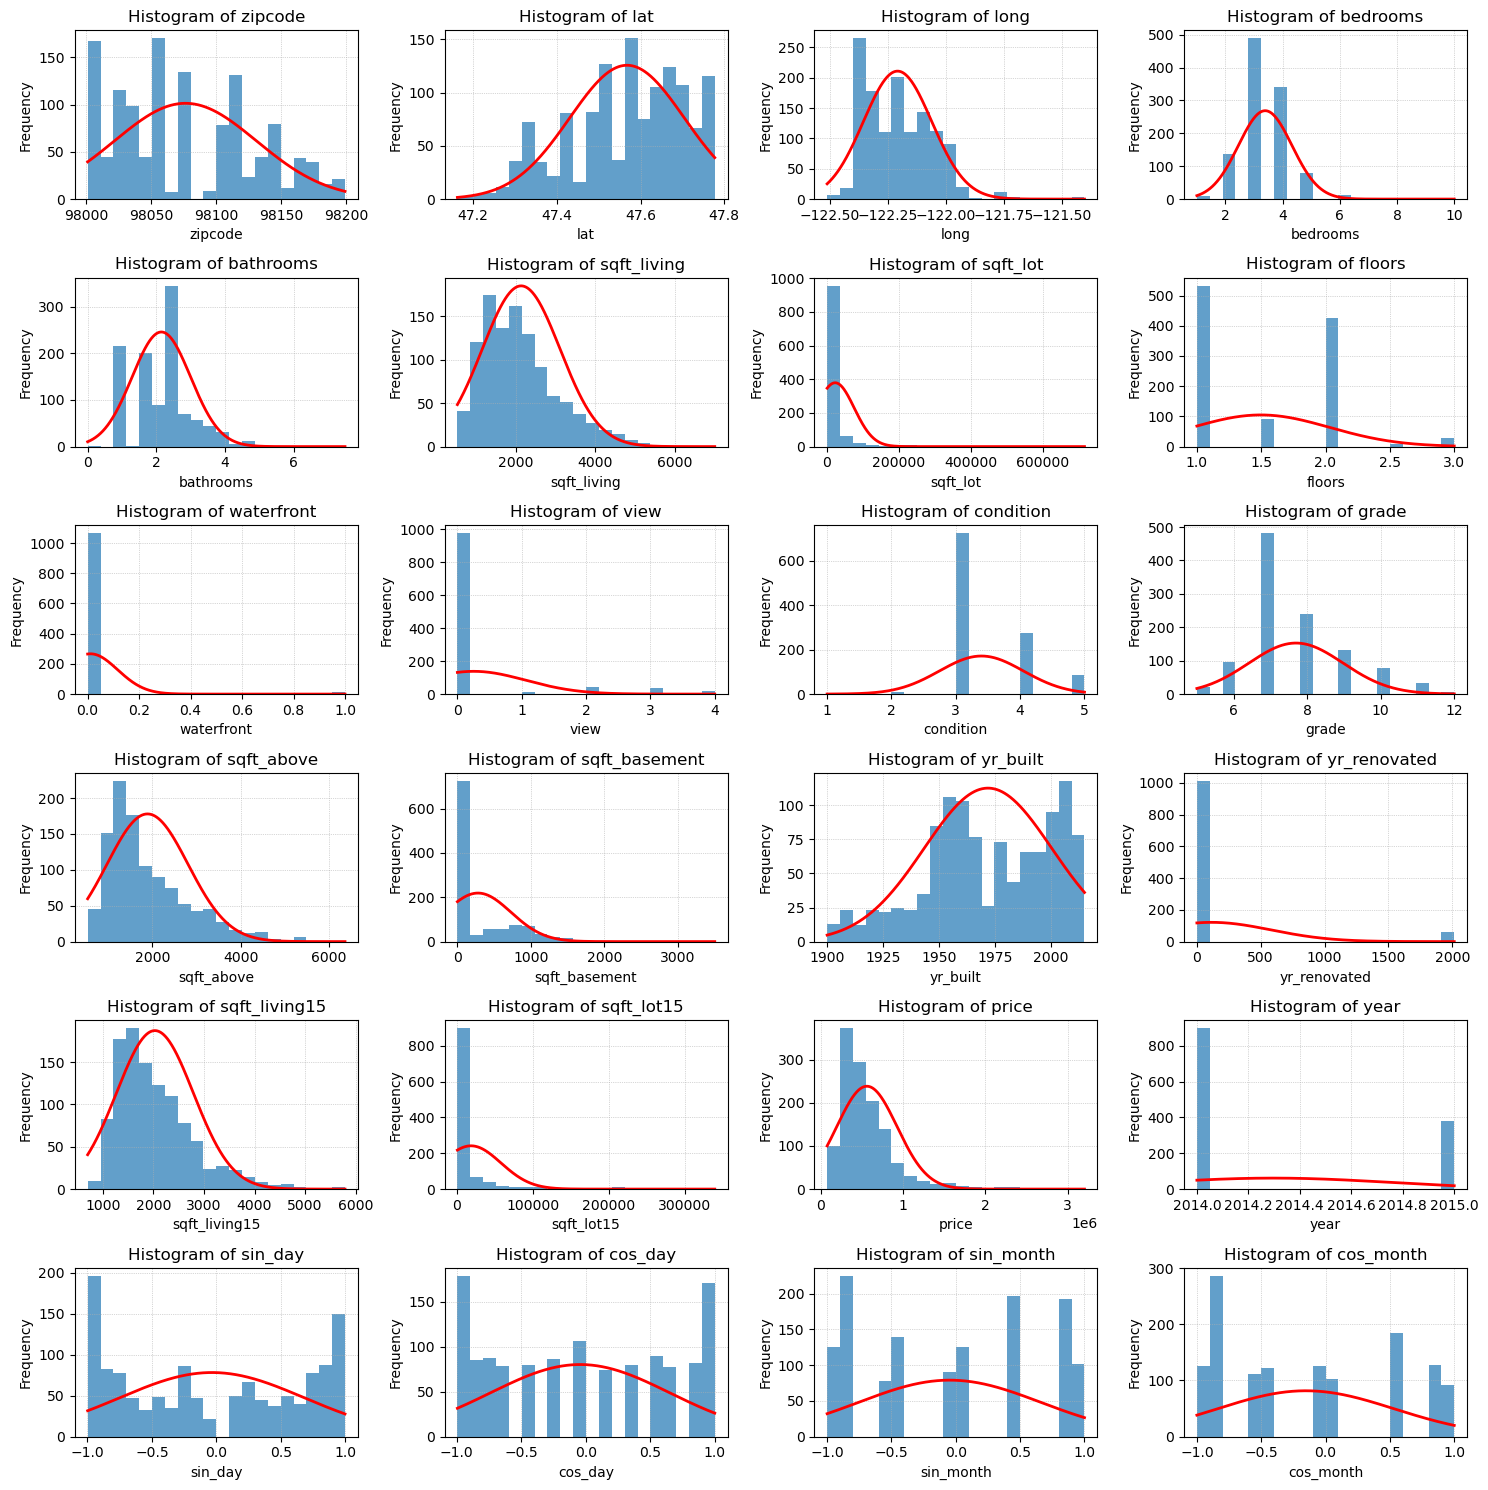

In [15]:
df = train_set.drop(['ID'], axis = 1)

df = pd.get_dummies(df,drop_first=True)


# Get the column names of the DataFrame
column_names = df.columns 

# Calculate the number of rows and columns for the subplots
num_rows = int(np.ceil(len(column_names) / 4))
num_cols = min(len(column_names), 4)

# Create subplots for each column
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))

# Iterate over each column and plot the histogram with PDF
for i, column in enumerate(column_names):
    # Calculate the subplot index
    row_index = i // num_cols
    col_index = i % num_cols

    # Select the current subplot
    ax = axes[row_index, col_index]

    # Plot the histogram
    ax.hist(df[column], bins=20, density=False, alpha=0.7)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_title('Histogram of ' + column)

    # Calculate the mean and standard deviation of the data
    mean = np.mean(df[column])
    std = np.std(df[column])

    # Generate an x-axis range for the PDF curve with a finer mesh
    x = np.linspace(np.min(df[column]), np.max(df[column]), 1000)

    # Compute the PDF values using a normal distribution with the calculated mean and standard deviation
    pdf = norm.pdf(x, mean, std)

    # Scale the PDF values to match the frequency scale
    pdf_scaled = pdf * len(df[column]) * np.diff(ax.get_xlim())[0] / 20

    # Plot the scaled PDF curve on top of the histogram
    ax.plot(x, pdf_scaled, 'r-', linewidth=2)

    # Add a minor grid to the plot
    ax.grid(True, which='both', linestyle=':', linewidth=0.5)

# Remove empty subplots
if len(column_names) < num_rows * num_cols:
    for i in range(len(column_names), num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

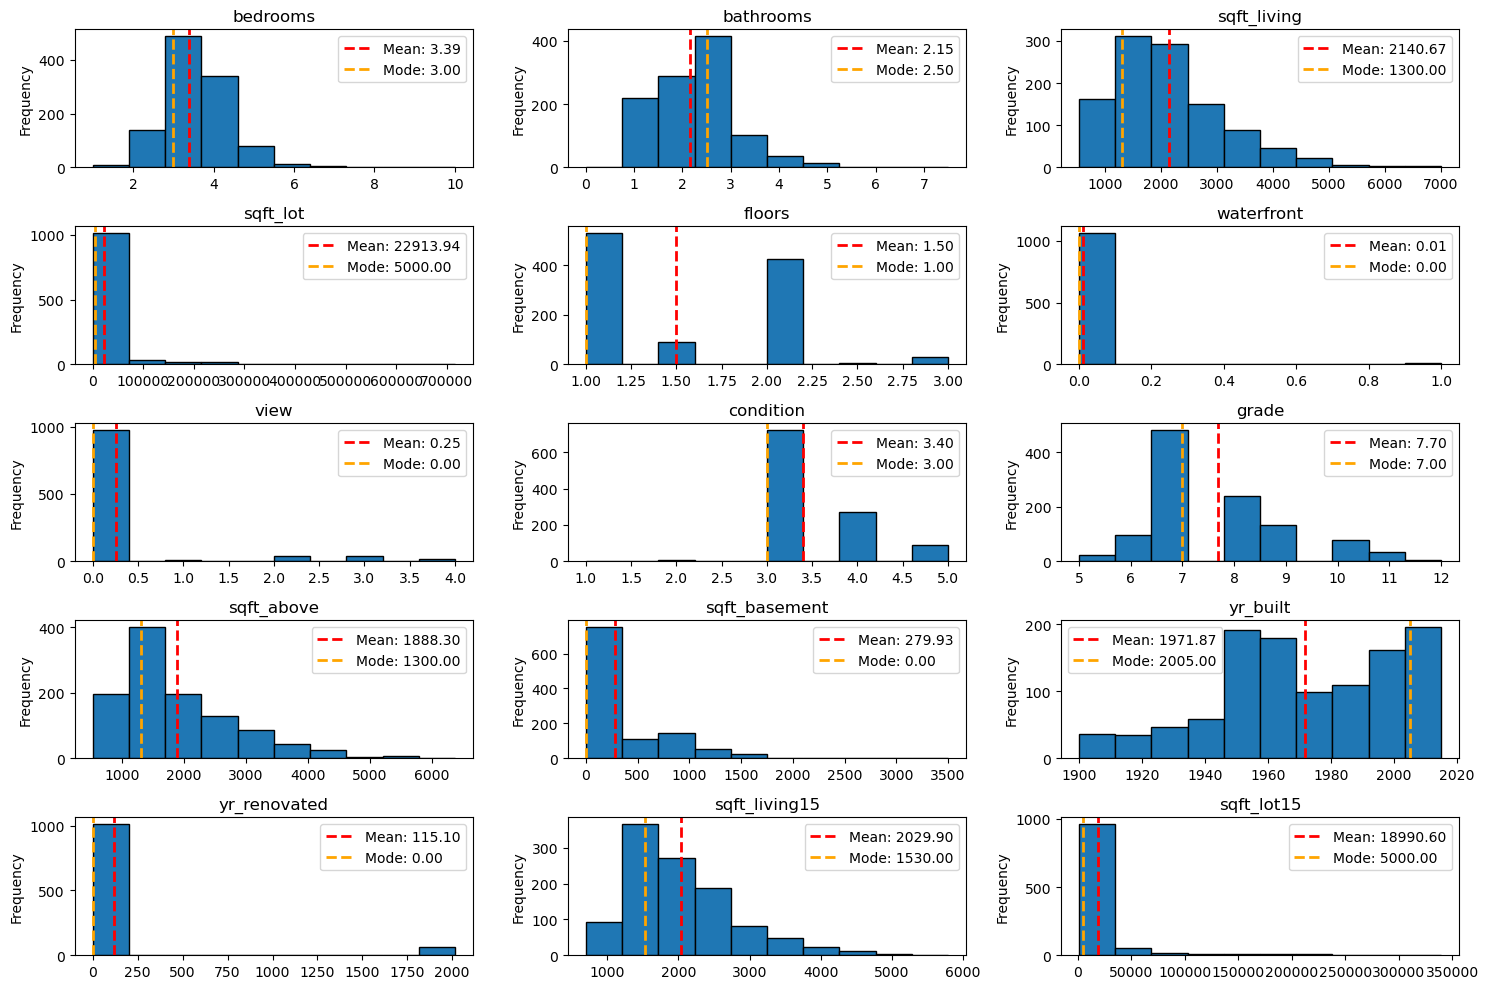

In [16]:
#grafico de columnas con valores NaN

# Calculate the number of rows and columns for subplots
num_cols = 3
num_rows = -(-len(train_nan_columns) // num_cols)  # Ceiling division

# Define the size of the image
fig_width = 15  # width in inches
fig_height = 2 * num_rows  # height in inches

# Create subplots with modified size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Create histograms for selected columns and plot them in subplots
for i, column in enumerate(train_nan_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    ax.hist(df[column], bins=10, edgecolor='black')
    
    # Calculate and plot the mean value
    mean_value = df[column].mean()
    ax.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
    ax.legend()
     # Calculate and plot the mode value
    mode_value = df[column].mode()[0]
    ax.axvline(mode_value, color='orange', linestyle='dashed', linewidth=2, label=f'Mode: {mode_value:.2f}')
    ax.legend()
    
    ax.set_title(column)
    ax.set_ylabel('Frequency')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

* No EJECUTAR

In [15]:
def fill_nan(df):
    # Itera a través de las columnas del DataFrame
    for column in df.columns:
        # Verifica si la columna tiene valores NaN
        if df[column].isnull().any():
            # Calcula el promedio de la columna actual
            column_mean = round(df[column].mean())

            # Rellena los valores NaN en la columna con el promedio de la columna
            df[column].fillna(column_mean, inplace=True)

    return df


# **TEST SET**

In [17]:
datainfo(test_set)

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
ID,int64,320,320,0,0.0000
zipcode,int64,320,62,0,0.0000
lat,float64,320,302,0,0.0000
long,float64,320,220,0,0.0000
bedrooms,float64,285,6,35,10.9375
bathrooms,float64,292,16,28,8.7500
sqft_living,float64,293,199,27,8.4375
sqft_lot,float64,286,249,34,10.6250
floors,float64,295,5,25,7.8125
waterfront,float64,291,2,29,9.0625


In [18]:
test_nan_columns = test_set.columns[test_set.isna().any()]
test_nan_counts = test_set[test_nan_columns].isna().sum()

# Create a DataFrame with the NaN columns and their counts
nan_table_test = pd.DataFrame({'Atributo con registros vacíos': test_nan_columns,
                          'Número de registros vacíos': test_nan_counts})

# Print the NaN table
print(nan_table_test)

              Atributo con registros vacíos  Número de registros vacíos
bedrooms                           bedrooms                          35
bathrooms                         bathrooms                          28
sqft_living                     sqft_living                          27
sqft_lot                           sqft_lot                          34
floors                               floors                          25
waterfront                       waterfront                          29
view                                   view                          33
condition                         condition                          31
grade                                 grade                          32
sqft_above                       sqft_above                          33
sqft_basement                 sqft_basement                          20
yr_built                           yr_built                          41
yr_renovated                   yr_renovated                     

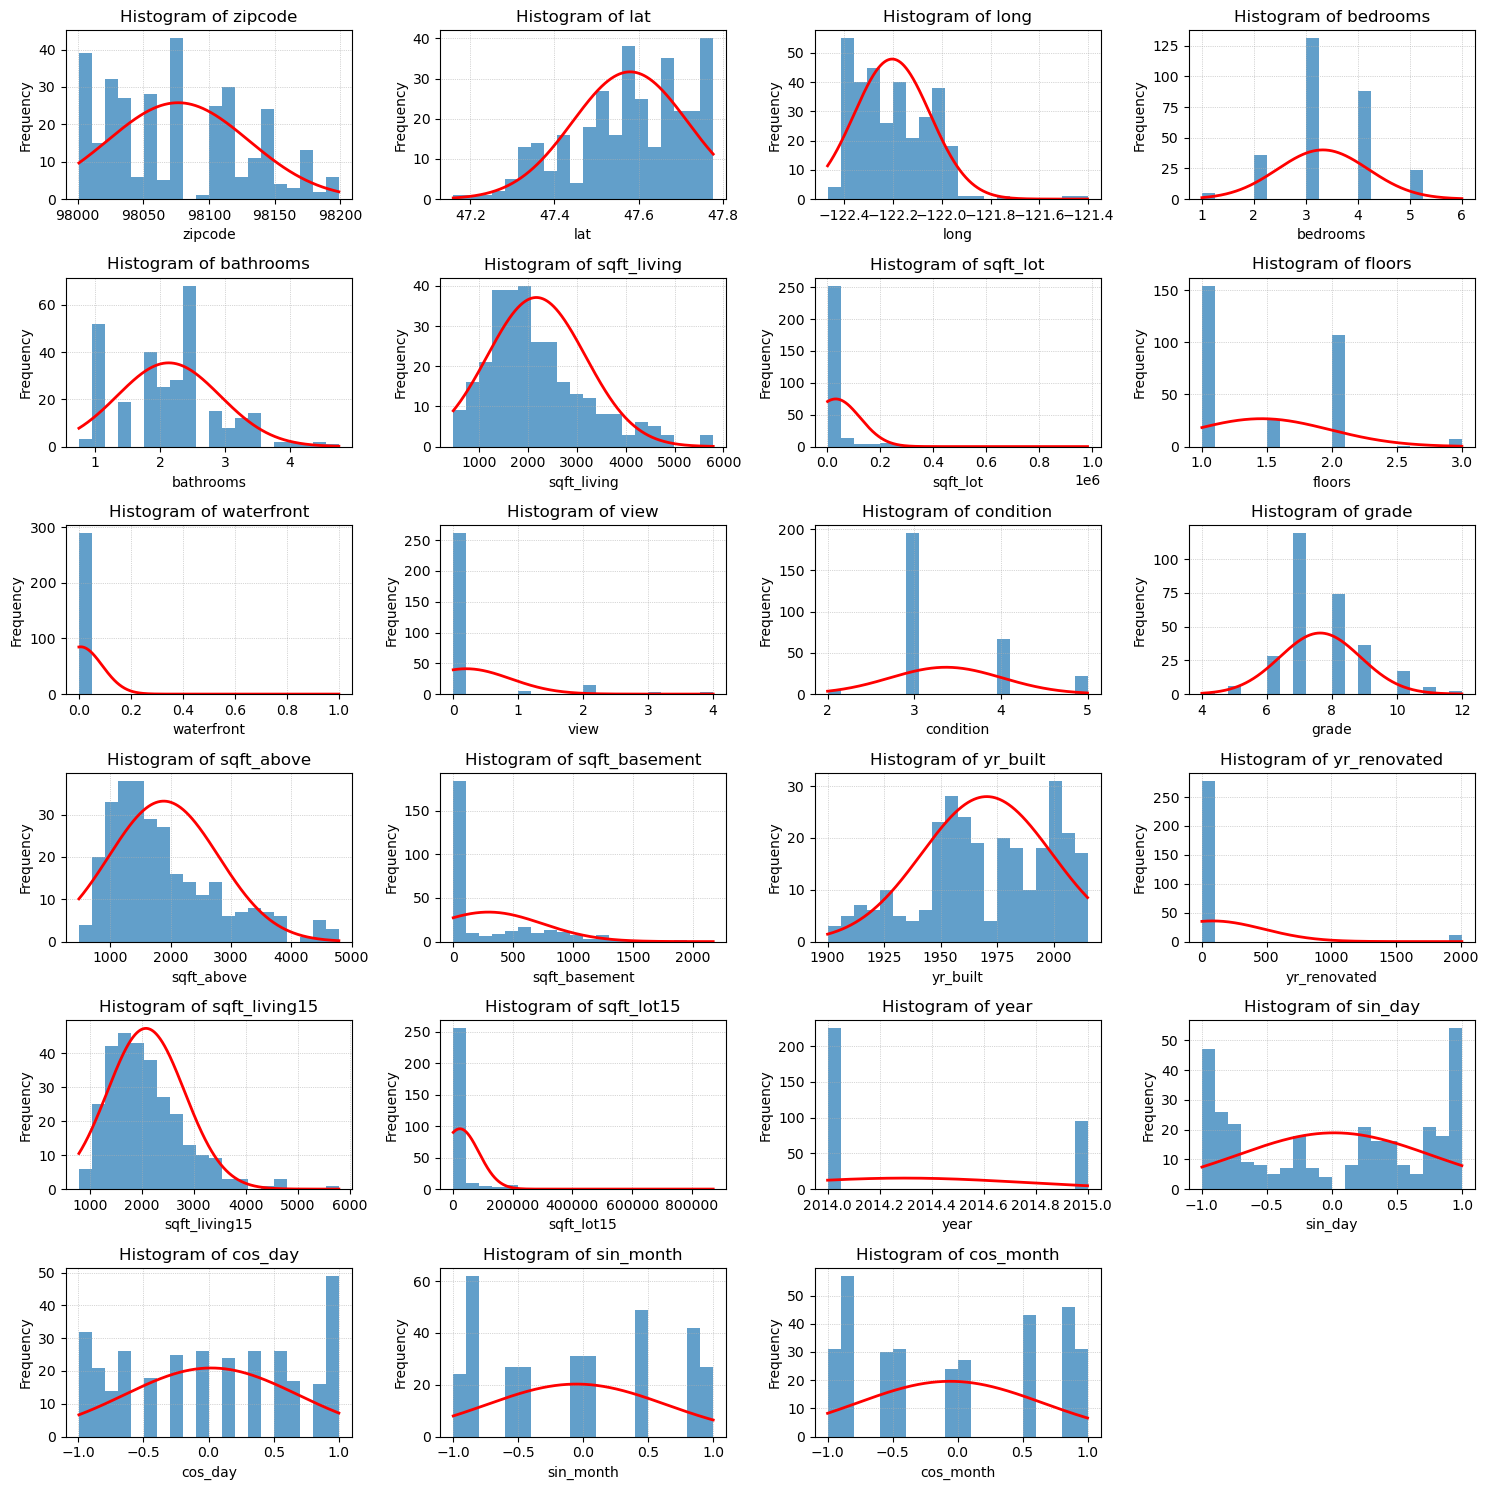

In [19]:
df2 = test_set.drop(['ID'], axis = 1)

df2 = pd.get_dummies(df2,drop_first=True)


# Get the column names of the DataFrame
column_names = df2.columns 

# Calculate the number of rows and columns for the subplots
num_rows = int(np.ceil(len(column_names) / 4))
num_cols = min(len(column_names), 4)

# Create subplots for each column
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))

# Iterate over each column and plot the histogram with PDF
for i, column in enumerate(column_names):
    # Calculate the subplot index
    row_index = i // num_cols
    col_index = i % num_cols

    # Select the current subplot
    ax = axes[row_index, col_index]

    # Plot the histogram
    ax.hist(df2[column], bins=20, density=False, alpha=0.7)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_title('Histogram of ' + column)

    # Calculate the mean and standard deviation of the data
    mean = np.mean(df2[column])
    std = np.std(df2[column])

    # Generate an x-axis range for the PDF curve with a finer mesh
    x = np.linspace(np.min(df2[column]), np.max(df2[column]), 1000)

    # Compute the PDF values using a normal distribution with the calculated mean and standard deviation
    pdf = norm.pdf(x, mean, std)

    # Scale the PDF values to match the frequency scale
    pdf_scaled = pdf * len(df2[column]) * np.diff(ax.get_xlim())[0] / 20

    # Plot the scaled PDF curve on top of the histogram
    ax.plot(x, pdf_scaled, 'r-', linewidth=2)

    # Add a minor grid to the plot
    ax.grid(True, which='both', linestyle=':', linewidth=0.5)

# Remove empty subplots
if len(column_names) < num_rows * num_cols:
    for i in range(len(column_names), num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

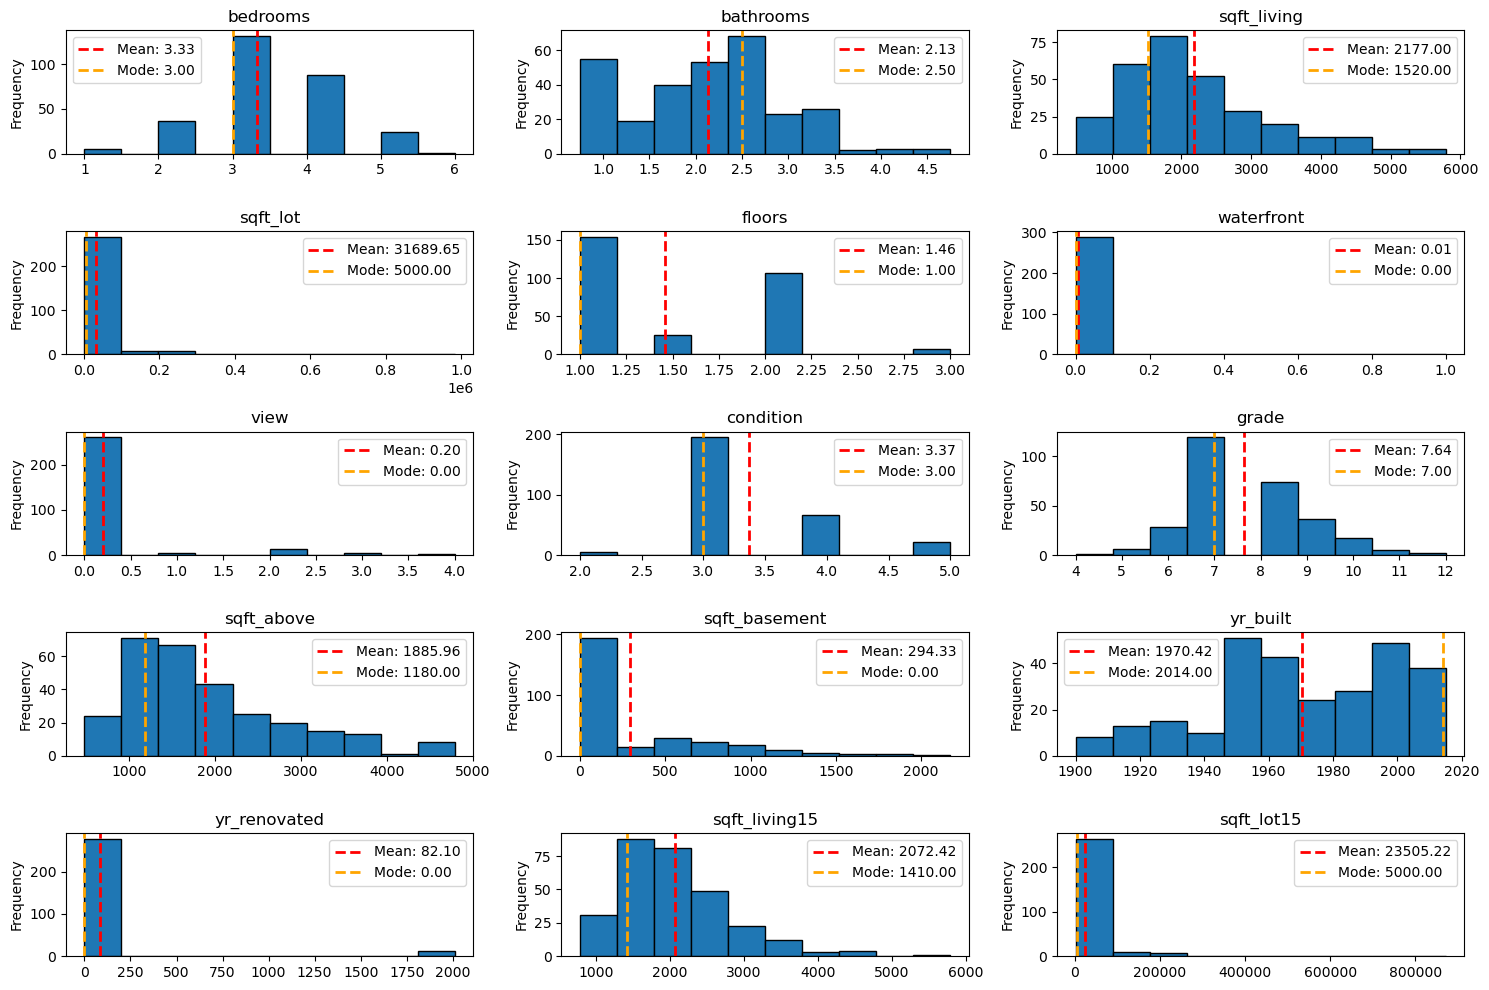

In [20]:
#Grafico NAN columns de test_set

num_cols = 3
num_rows = -(-len(test_nan_columns) // num_cols)  # Ceiling division

# Define the size of the image
fig_width = 15  # width in inches
fig_height = 2 * num_rows  # height in inches

# Create subplots with modified size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Create histograms for selected columns and plot them in subplots
for i, column in enumerate(test_nan_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    ax.hist(test_set[column], bins=10, edgecolor='black')
    
    # Calculate and plot the mean value
    mean_value = test_set[column].mean()
    ax.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
    ax.legend()
     # Calculate and plot the mode value
    mode_value = test_set[column].mode()[0]
    ax.axvline(mode_value, color='orange', linestyle='dashed', linewidth=2, label=f'Mode: {mode_value:.2f}')
    ax.legend()
    
    ax.set_title(column)
    ax.set_ylabel('Frequency')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# **SE RELLENAN NAN VALUES**

In [21]:
import math
def pol_coord(lat, long):
    r = math.sqrt(lat*lat+long*long)
    phi = math.atan2(lat,long)
    return r, phi

df_coord = pd.DataFrame()
for i in np.arange(0, train_set.shape[0]):
    r, phi = pol_coord(train_set['lat'][i], train_set['long'][i])
    df_coord.at[i, 'r'] = r
    df_coord.at[i, 'phi'] = phi

r_mean = df_coord['r'].mean()
def divide(value):
    return value / r_mean
df_coord['r'] = df_coord['r'].apply(divide)

if 'lat' and 'long' in df:
    train_set= pd.concat([train_set,df_coord], axis=1)
    train_set = train_set.drop(['lat','long'], axis=1)

In [22]:
import math
def pol_coord(lat, long):
    r = math.sqrt(lat*lat+long*long)
    phi = math.atan2(lat,long)
    return r, phi

df_coord = pd.DataFrame()
for i in np.arange(0, test_set.shape[0]):
    r, phi = pol_coord(test_set['lat'][i], test_set['long'][i])
    df_coord.at[i, 'r'] = r
    df_coord.at[i, 'phi'] = phi

r_mean = df_coord['r'].mean()
def divide(value):
    return value / r_mean
df_coord['r'] = df_coord['r'].apply(divide)

if 'lat' and 'long' in df:
    test_set= pd.concat([test_set,df_coord], axis=1)
    test_set = test_set.drop(['lat','long'], axis=1)

In [23]:
train_set

,ID,zipcode,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_living15,sqft_lot15,price,year,sin_day,cos_day,sin_month,cos_month,r,phi
0,143,98003,3.0,2.25,1590.0,7748.0,2.0,0.0,0.0,4.0,...,1590.0,7606.0,263000.0,2014,0.101168,-0.994869,5.000000e-01,-8.660254e-01,0.999880,2.772659
1,1175,98117,3.0,NaN,2040.0,4005.0,NaN,0.0,0.0,4.0,...,1380.0,4005.0,620000.0,2014,0.571268,0.820763,-2.449294e-16,1.000000e+00,1.001560,2.770018
2,221,98106,2.0,1.00,640.0,7768.0,1.0,0.0,0.0,3.0,...,NaN,7424.0,165000.0,2014,0.790776,-0.612106,-5.000000e-01,-8.660254e-01,1.000931,2.771192
3,1231,98144,2.0,1.50,1240.0,NaN,NaN,0.0,0.0,NaN,...,1530.0,1209.0,403000.0,2014,-0.299363,-0.954139,-5.000000e-01,8.660254e-01,1.000743,2.770622
4,509,98038,3.0,NaN,1990.0,NaN,2.0,0.0,NaN,3.0,...,2580.0,3800.0,318200.0,2015,0.394356,0.918958,8.660254e-01,-5.000000e-01,0.998053,2.771399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,954,98014,3.0,2.50,3230.0,129578.0,1.0,0.0,0.0,NaN,...,2760.0,62059.0,499950.0,2015,-0.998717,-0.050649,8.660254e-01,-5.000000e-01,0.998224,2.768769
1272,104,98103,4.0,1.50,NaN,4000.0,1.5,NaN,2.0,NaN,...,1160.0,4000.0,750000.0,2015,0.988468,0.151428,5.000000e-01,-8.660254e-01,1.001360,2.769963
1273,138,98003,3.0,NaN,NaN,6600.0,NaN,0.0,NaN,3.0,...,1660.0,NaN,250000.0,2014,0.790776,-0.612106,-1.000000e+00,-1.836970e-16,0.999885,2.772686
1274,1529,98075,3.0,2.25,3000.0,11665.0,1.5,1.0,4.0,3.0,...,3000.0,15959.0,2400000.0,2014,0.968077,-0.250653,5.000000e-01,-8.660254e-01,0.999194,2.769915


In [24]:
test_set

,ID,zipcode,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,sqft_living15,sqft_lot15,year,sin_day,cos_day,sin_month,cos_month,r,phi
0,1473,98006,NaN,4.50,4490.0,24767.0,2.0,0.0,2.0,3.0,...,0.0,3370.0,32700.0,2015,-8.978045e-01,-0.440394,8.660254e-01,-5.000000e-01,0.999534,2.770326
1,716,98030,3.0,NaN,1730.0,6007.0,NaN,0.0,0.0,NaN,...,0.0,2000.0,6245.0,2014,-3.943559e-01,0.918958,-8.660254e-01,5.000000e-01,0.999367,2.771874
2,1360,98074,4.0,2.50,3720.0,8633.0,2.0,0.0,0.0,3.0,...,NaN,3515.0,9660.0,2014,-2.993631e-01,-0.954139,-2.449294e-16,1.000000e+00,0.998732,2.769570
3,1522,98027,4.0,2.50,2550.0,NaN,2.0,0.0,0.0,3.0,...,0.0,1870.0,56628.0,2014,1.011683e-01,-0.994869,-5.000000e-01,-8.660254e-01,0.998891,2.770592
4,1570,98146,1.0,0.75,480.0,9750.0,1.0,0.0,0.0,NaN,...,0.0,1550.0,9924.0,2014,-9.377521e-01,0.347305,-8.660254e-01,-5.000000e-01,1.000907,2.771319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,1475,98105,3.0,1.00,1710.0,NaN,1.0,0.0,0.0,3.0,...,0.0,1610.0,NaN,2014,-9.680771e-01,-0.250653,-2.449294e-16,1.000000e+00,1.000694,2.769827
316,374,98014,4.0,2.50,2770.0,63118.0,NaN,0.0,0.0,3.0,...,0.0,NaN,44224.0,2014,-7.247928e-01,0.688967,1.224647e-16,-1.000000e+00,0.998512,2.769044
317,795,98077,3.0,NaN,NaN,219978.0,2.0,0.0,0.0,3.0,...,0.0,3340.0,217800.0,2014,8.486443e-01,0.528964,-2.449294e-16,1.000000e+00,0.999330,2.768436
318,888,98056,3.0,1.00,960.0,5512.0,1.0,0.0,0.0,4.0,...,0.0,1090.0,5837.0,2015,-2.449294e-16,1.000000,1.000000e+00,6.123234e-17,0.999496,2.770802


In [25]:
X_train = train_set.drop(['price'], axis = 1)
y_train = train_set['price']

X_test = test_set

ID_train = X_train['ID']
ID_test = X_test['ID']

X_train = X_train.drop(['ID'], axis = 1)
X_test = X_test.drop(['ID'], axis = 1)

In [26]:
X_train_final = X_train
y_train_final = y_train

In [27]:
X_train

,zipcode,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,sqft_living15,sqft_lot15,year,sin_day,cos_day,sin_month,cos_month,r,phi
0,98003,3.0,2.25,1590.0,7748.0,2.0,0.0,0.0,4.0,7.0,...,0.0,1590.0,7606.0,2014,0.101168,-0.994869,5.000000e-01,-8.660254e-01,0.999880,2.772659
1,98117,3.0,NaN,2040.0,4005.0,NaN,0.0,0.0,4.0,8.0,...,0.0,1380.0,4005.0,2014,0.571268,0.820763,-2.449294e-16,1.000000e+00,1.001560,2.770018
2,98106,2.0,1.00,640.0,7768.0,1.0,0.0,0.0,3.0,6.0,...,0.0,NaN,7424.0,2014,0.790776,-0.612106,-5.000000e-01,-8.660254e-01,1.000931,2.771192
3,98144,2.0,1.50,1240.0,NaN,NaN,0.0,0.0,NaN,8.0,...,0.0,1530.0,1209.0,2014,-0.299363,-0.954139,-5.000000e-01,8.660254e-01,1.000743,2.770622
4,98038,3.0,NaN,1990.0,NaN,2.0,0.0,NaN,3.0,7.0,...,0.0,2580.0,3800.0,2015,0.394356,0.918958,8.660254e-01,-5.000000e-01,0.998053,2.771399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,98014,3.0,2.50,3230.0,129578.0,1.0,0.0,0.0,NaN,NaN,...,0.0,2760.0,62059.0,2015,-0.998717,-0.050649,8.660254e-01,-5.000000e-01,0.998224,2.768769
1272,98103,4.0,1.50,NaN,4000.0,1.5,NaN,2.0,NaN,7.0,...,1990.0,1160.0,4000.0,2015,0.988468,0.151428,5.000000e-01,-8.660254e-01,1.001360,2.769963
1273,98003,3.0,NaN,NaN,6600.0,NaN,0.0,NaN,3.0,7.0,...,0.0,1660.0,NaN,2014,0.790776,-0.612106,-1.000000e+00,-1.836970e-16,0.999885,2.772686
1274,98075,3.0,2.25,3000.0,11665.0,1.5,1.0,4.0,3.0,11.0,...,0.0,3000.0,15959.0,2014,0.968077,-0.250653,5.000000e-01,-8.660254e-01,0.999194,2.769915


In [28]:
X_test

,zipcode,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,sqft_living15,sqft_lot15,year,sin_day,cos_day,sin_month,cos_month,r,phi
0,98006,NaN,4.50,4490.0,24767.0,2.0,0.0,2.0,3.0,NaN,...,0.0,3370.0,32700.0,2015,-8.978045e-01,-0.440394,8.660254e-01,-5.000000e-01,0.999534,2.770326
1,98030,3.0,NaN,1730.0,6007.0,NaN,0.0,0.0,NaN,8.0,...,0.0,2000.0,6245.0,2014,-3.943559e-01,0.918958,-8.660254e-01,5.000000e-01,0.999367,2.771874
2,98074,4.0,2.50,3720.0,8633.0,2.0,0.0,0.0,3.0,10.0,...,NaN,3515.0,9660.0,2014,-2.993631e-01,-0.954139,-2.449294e-16,1.000000e+00,0.998732,2.769570
3,98027,4.0,2.50,2550.0,NaN,2.0,0.0,0.0,3.0,9.0,...,0.0,1870.0,56628.0,2014,1.011683e-01,-0.994869,-5.000000e-01,-8.660254e-01,0.998891,2.770592
4,98146,1.0,0.75,480.0,9750.0,1.0,0.0,0.0,NaN,4.0,...,0.0,1550.0,9924.0,2014,-9.377521e-01,0.347305,-8.660254e-01,-5.000000e-01,1.000907,2.771319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,98105,3.0,1.00,1710.0,NaN,1.0,0.0,0.0,3.0,7.0,...,0.0,1610.0,NaN,2014,-9.680771e-01,-0.250653,-2.449294e-16,1.000000e+00,1.000694,2.769827
316,98014,4.0,2.50,2770.0,63118.0,NaN,0.0,0.0,3.0,9.0,...,0.0,NaN,44224.0,2014,-7.247928e-01,0.688967,1.224647e-16,-1.000000e+00,0.998512,2.769044
317,98077,3.0,NaN,NaN,219978.0,2.0,0.0,0.0,3.0,8.0,...,0.0,3340.0,217800.0,2014,8.486443e-01,0.528964,-2.449294e-16,1.000000e+00,0.999330,2.768436
318,98056,3.0,1.00,960.0,5512.0,1.0,0.0,0.0,4.0,6.0,...,0.0,1090.0,5837.0,2015,-2.449294e-16,1.000000,1.000000e+00,6.123234e-17,0.999496,2.770802


# **SE SEPARA X_TRAIN, X_TEST e Y_TRAIN Y_VAL**

In [29]:
# DIVIDIMOS x_train

a=np.expand_dims(X_train, axis=2)
a=np.expand_dims(a, axis=3)
a.shape





(1276, 23, 1, 1)

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
X_test_prueba, X_val, y_test_prueba, y_val = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

In [31]:
x_train_nan_columns = X_train.columns[X_train.isna().any()]
x_train_nan_counts = X_train[x_train_nan_columns].isna().sum()

# Create a DataFrame with the NaN columns and their counts
nan_table_x_train = pd.DataFrame({'Atributo con registros vacíos': x_train_nan_columns,
                          'Número de registros vacíos': x_train_nan_counts})

# Print the NaN table
print(nan_table_x_train)


              Atributo con registros vacíos  Número de registros vacíos
bedrooms                           bedrooms                         146
bathrooms                         bathrooms                         138
sqft_living                     sqft_living                         131
sqft_lot                           sqft_lot                         128
floors                               floors                         135
waterfront                       waterfront                         149
view                                   view                         132
condition                         condition                         133
grade                                 grade                         135
sqft_above                       sqft_above                         131
sqft_basement                 sqft_basement                         133
yr_built                           yr_built                         100
yr_renovated                   yr_renovated                     

In [32]:
x_val_nan_columns = X_val.columns[X_val.isna().any()]
x_val_nan_counts = X_val[x_val_nan_columns].isna().sum()

# Create a DataFrame with the NaN columns and their counts
nan_table_x_val = pd.DataFrame({'Atributo con registros vacíos': x_val_nan_columns,
                          'Número de registros vacíos': x_val_nan_counts})

# Print the NaN table
print(nan_table_x_val)

              Atributo con registros vacíos  Número de registros vacíos
bedrooms                           bedrooms                          28
bathrooms                         bathrooms                          27
sqft_living                     sqft_living                          30
sqft_lot                           sqft_lot                          37
floors                               floors                          25
waterfront                       waterfront                          26
view                                   view                          33
condition                         condition                          25
grade                                 grade                          29
sqft_above                       sqft_above                          28
sqft_basement                 sqft_basement                          28
yr_built                           yr_built                          26
yr_renovated                   yr_renovated                     

In [33]:
x_testp_nan_columns = X_test_prueba.columns[X_test_prueba.isna().any()]
x_testp_nan_counts = X_test_prueba[x_testp_nan_columns].isna().sum()

# Create a DataFrame with the NaN columns and their counts
nan_table_x_testp = pd.DataFrame({'Atributo con registros vacíos': x_testp_nan_columns,
                          'Número de registros vacíos': x_testp_nan_counts})

# Print the NaN table
print(nan_table_x_testp)

              Atributo con registros vacíos  Número de registros vacíos
bedrooms                           bedrooms                          28
bathrooms                         bathrooms                          32
sqft_living                     sqft_living                          33
sqft_lot                           sqft_lot                          24
floors                               floors                          32
waterfront                       waterfront                          25
view                                   view                          29
condition                         condition                          23
grade                                 grade                          26
sqft_above                       sqft_above                          28
sqft_basement                 sqft_basement                          22
yr_built                           yr_built                          37
yr_renovated                   yr_renovated                     

In [35]:
# RELLENAMOS NAN VALUES

columns_to_apply_median = ['yr_renovated', 'sqft_lot15','view','grade','waterfront','floors','condition']

empty_columns = X_train.columns[X_train.isnull().any()].tolist()
column_means_before = X_train[empty_columns].mean()


for column in X_train.columns:
    if X_train[column].isna().any():
        if column in columns_to_apply_median:
            column_mean = X_train[column].median()
            column_mean_final = X_train_final[column].median()
        else:
            column_mean = round(X_train[column].mean())
            column_mean_final = round(X_train_final[column].mean())

        ### LLENADO DE X_TRAIN CON X_MEAN de train data o mediana
        X_train[column].fillna(column_mean, inplace=True)
        X_train_final[column].fillna(column_mean_final, inplace=True)
        ### LLENADO DE X_TEST CON X_MEAN DEL TRAIN SET

        if X_test_prueba[column].isna().any():
            X_test_prueba[column].fillna(column_mean, inplace=True)

        if X_val[column].isna().any():
            X_val[column].fillna(column_mean, inplace=True)

        if X_test[column].isna().any():
            X_test[column].fillna(column_mean_final, inplace=True)

    
# Mean value after doing the replacement
column_means_after = X_train[empty_columns].mean()

#Checking the comparisson
comparison_X = pd.DataFrame({'Column Means (Before)': column_means_before,
                              'Column Means (After)': column_means_after})

# Print the comparison DataFrame
print(comparison_X)

Empty DataFrame
Columns: [Column Means (Before), Column Means (After)]
Index: []


In [36]:
# SE corrobora que se rellenen los valores NaN

datainfo(X_train)

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
zipcode,int64,893,65,0,0.0
bedrooms,float64,893,9,0,0.0
bathrooms,float64,893,20,0,0.0
sqft_living,float64,893,312,0,0.0
sqft_lot,float64,893,629,0,0.0
floors,float64,893,5,0,0.0
waterfront,float64,893,2,0,0.0
view,float64,893,5,0,0.0
condition,float64,893,4,0,0.0
grade,float64,893,8,0,0.0


In [37]:
datainfo(X_val)

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
zipcode,int64,192,54,0,0.0
bedrooms,float64,192,7,0,0.0
bathrooms,float64,192,15,0,0.0
sqft_living,float64,192,129,0,0.0
sqft_lot,float64,192,148,0,0.0
floors,float64,192,4,0,0.0
waterfront,float64,192,2,0,0.0
view,float64,192,5,0,0.0
condition,float64,192,5,0,0.0
grade,float64,192,8,0,0.0


In [38]:
datainfo(X_test_prueba)

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
zipcode,int64,191,55,0,0.0
bedrooms,float64,191,7,0,0.0
bathrooms,float64,191,14,0,0.0
sqft_living,float64,191,127,0,0.0
sqft_lot,float64,191,162,0,0.0
floors,float64,191,4,0,0.0
waterfront,float64,191,2,0,0.0
view,float64,191,5,0,0.0
condition,float64,191,4,0,0.0
grade,float64,191,7,0,0.0


In [39]:
datainfo(X_train_final)

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
zipcode,int64,1276,66,0,0.0
bedrooms,float64,1276,10,0,0.0
bathrooms,float64,1276,22,0,0.0
sqft_living,float64,1276,367,0,0.0
sqft_lot,float64,1276,871,0,0.0
floors,float64,1276,5,0,0.0
waterfront,float64,1276,2,0,0.0
view,float64,1276,5,0,0.0
condition,float64,1276,5,0,0.0
grade,float64,1276,8,0,0.0


In [40]:
datainfo(X_test)

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
zipcode,int64,320,62,0,0.0
bedrooms,float64,320,6,0,0.0
bathrooms,float64,320,16,0,0.0
sqft_living,float64,320,200,0,0.0
sqft_lot,float64,320,250,0,0.0
floors,float64,320,5,0,0.0
waterfront,float64,320,2,0,0.0
view,float64,320,5,0,0.0
condition,float64,320,4,0,0.0
grade,float64,320,9,0,0.0


In [41]:
from sklearn import preprocessing

In [42]:
X_scaler = preprocessing.StandardScaler()
y_scaler = preprocessing.StandardScaler()

X_scaler_final = preprocessing.StandardScaler()
y_scaler_final = preprocessing.StandardScaler()

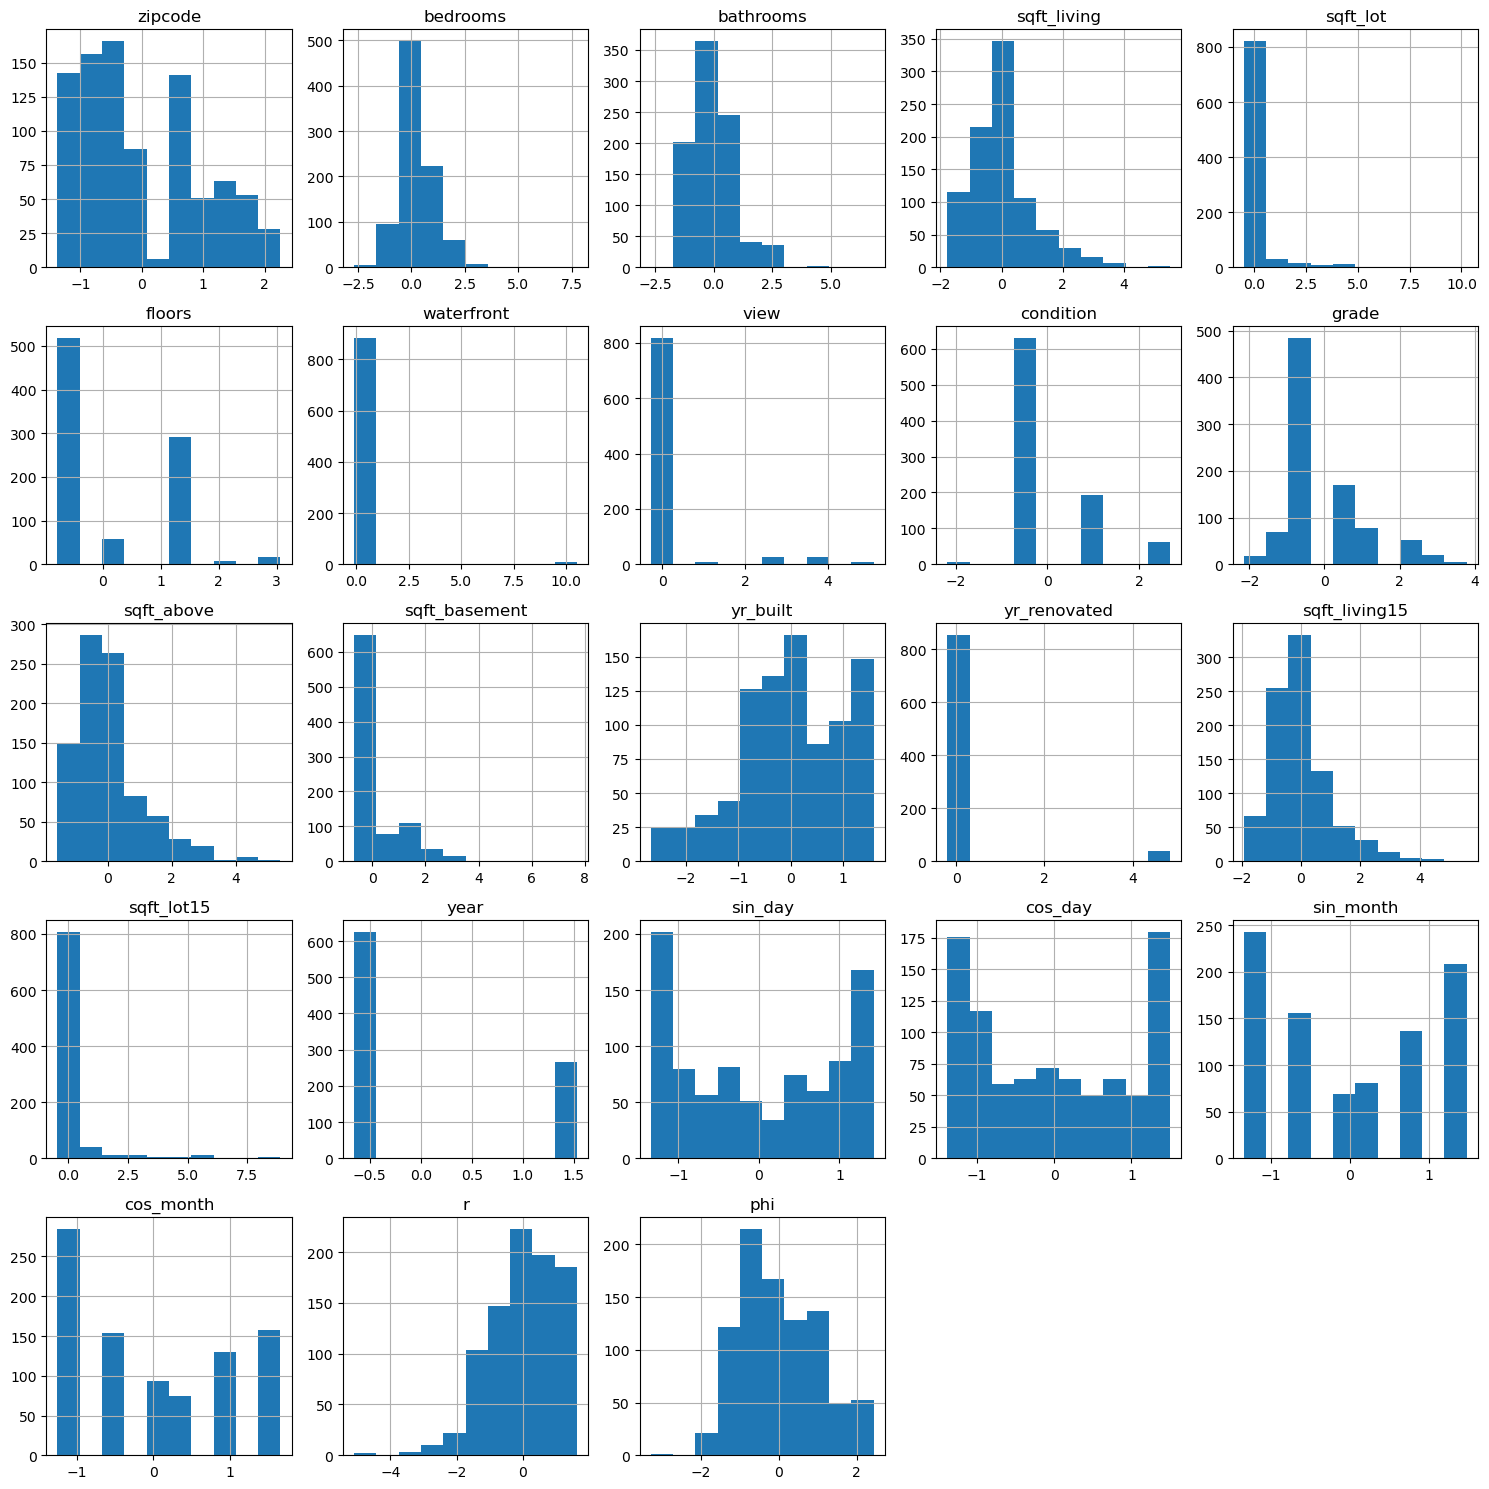

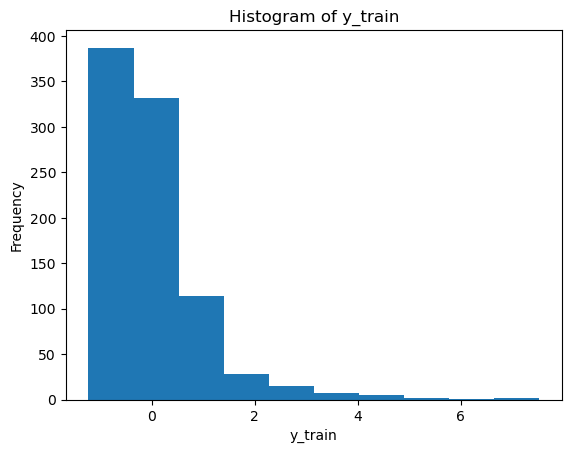

In [43]:
cols_to_normalize = [col for col in X_train.columns]


for col in cols_to_normalize:
    X_train[col] = X_scaler.fit_transform(X_train[[col]])
    X_test_prueba[col] = X_scaler.transform(X_test_prueba[[col]])
    X_val[col] = X_scaler.transform(X_val[[col]])
    X_train_final[col] = X_scaler_final.fit_transform(X_train_final[[col]])
    X_test[col] = X_scaler_final.transform(X_test[[col]])

y_train = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_prueba = y_scaler.transform(y_test_prueba.values.reshape(-1, 1))
y_val = y_scaler.transform(y_val.values.reshape(-1, 1))
y_train_final = y_scaler_final.fit_transform(y_train_final.values.reshape(-1, 1))
X_train.hist(figsize=(15, 15))
plt.tight_layout()
plt.show()

plt.hist(y_train, bins=10)
plt.xlabel('y_train')
plt.ylabel('Frequency')
plt.title('Histogram of y_train')
plt.show()

In [46]:
%%capture
l1 = 0.001

param_grid = {
    "n_layers": [0, 1, 2 , 3],
    "activation": ["relu"],
    "alpha": [0.0001, 0.001, 0.01],
    "learning_rate": [  0.001, 0.0001, 0.00001],
    "optimizer": ["adamw"],
}
patience=10
my_callbacks = [keras.callbacks.EarlyStopping(monitor="val_mse",min_delta=0,patience=patience,verbose=0,mode="auto",baseline=None,restore_best_weights=True,)]

# Construimos el modelo
def build_model(layers, neurons_per_layer, activation, alpha, learning_rate, optimizer):
    model = Sequential()
    model.add(Dense(X_train.shape[1], activation=activation, input_shape=(X_train.shape[1],)))


    for k in neurons_per_layer:
        model.add(Dense(k, activation=activation,kernel_regularizer=regularizers.l1(l1=alpha)))
        model.add(Dropout(0.2))
    model.add(Dense(1, activation="linear"))

    # Elegimos el optimizador,
    if optimizer == "adam":
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == "rms":
        opt=keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer =="adamw":
        opt=tf.keras.optimizers.AdamW(learning_rate=learning_rate,weight_decay=0.004,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False, clipnorm=None,clipvalue=None,global_clipnorm=None,use_ema=False,ema_momentum=0.99,ema_overwrite_frequency=None,jit_compile=True,name="AdamW")

    # Compilamos el modelo
    model.compile(loss="mse", optimizer=opt, metrics=["mse"])
    model.summary()
    return model

In [47]:
modelos = {}
metricas ={}
contador = 0
nn=[[128, 64, 32],[256, 128,64,32], [512, 256, 128, 64, 32], [1024, 512, 256, 128, 64, 32]]

# Iteramos sobre el espacio de búsqueda
for layers in param_grid["n_layers"]:
    neurons_per_layer=nn[layers]

    #hacer ciclos for para ir construyendo distintos modelos
    #for layers in param_grid["n_layers"]:
    for neurons in neurons_per_layer:
        for activation in param_grid["activation"]:
            for alpha in param_grid["alpha"]:
                for learning_rate in param_grid["learning_rate"]:
                    for optimizer in param_grid["optimizer"]:
                        # Entrenamos el modelo
                        modelos['Modelo'+str(contador)] = build_model(layers, neurons_per_layer, activation, alpha, learning_rate, optimizer)
                        modelos['Modelo'+str(contador)].fit(X_train, y_train, epochs=80, batch_size=5, validation_data=(X_val, y_val), callbacks=my_callbacks)
                        loss, mse = modelos['Modelo'+str(contador)].evaluate(X_test_prueba, y_test_prueba)
                        metricas['Modelo'+str(contador)] = [layers,neurons_per_layer,activation,alpha,learning_rate,optimizer,loss, mse]
                    
                        print(f"N°: {contador},{neurons_per_layer} neuronas por capa, {activation} activación, {alpha} regularización, {learning_rate} learning rate, {optimizer} optimizador: {loss:.4f}, {mse:.4f}")
                        contador += 1
# imprimir los modelos y sus metricas
    print(modelos)
    print(metricas)



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 23)                552       
                                                                 
 dense_1 (Dense)             (None, 128)               3072      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)               

In [ ]:
# Entrenamos el modelo
#model = build_model(n_layers, neurons_per_layer, param_grid["activation"], param_grid["alpha"], param_grid["learning_rate"], param_grid["optimizer"])
#es = EarlyStopping(patience=25)
#model.fit(X_train, y_train, epochs=100, batch_size=256, validation_data=(X_val, y_val), callbacks=[es])

# Evaluamos el modelo en el conjunto de pruebas
#loss, mse = model.evaluate(X_test, y_test)
# print(f"{n_layers} capas, {neurons_per_layer} neuronas por capa, {activation} activación, {alpha} regularización, {learning_rate} learning rate, {optimizer} optimizador: {loss:.4f}, {mse:.4f}")


In [48]:
met=pd.DataFrame(metricas)
met

,Modelo0,Modelo1,Modelo2,Modelo3,Modelo4,Modelo5,Modelo6,Modelo7,Modelo8,Modelo9,...,Modelo152,Modelo153,Modelo154,Modelo155,Modelo156,Modelo157,Modelo158,Modelo159,Modelo160,Modelo161
0,0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
1,"[128, 64, 32]","[128, 64, 32]","[128, 64, 32]","[128, 64, 32]","[128, 64, 32]","[128, 64, 32]","[128, 64, 32]","[128, 64, 32]","[128, 64, 32]","[128, 64, 32]",...,"[1024, 512, 256, 128, 64, 32]","[1024, 512, 256, 128, 64, 32]","[1024, 512, 256, 128, 64, 32]","[1024, 512, 256, 128, 64, 32]","[1024, 512, 256, 128, 64, 32]","[1024, 512, 256, 128, 64, 32]","[1024, 512, 256, 128, 64, 32]","[1024, 512, 256, 128, 64, 32]","[1024, 512, 256, 128, 64, 32]","[1024, 512, 256, 128, 64, 32]"
2,relu,relu,relu,relu,relu,relu,relu,relu,relu,relu,...,relu,relu,relu,relu,relu,relu,relu,relu,relu,relu
3,0.0001,0.0001,0.0001,0.001,0.001,0.001,0.01,0.01,0.01,0.0001,...,0.01,0.0001,0.0001,0.0001,0.001,0.001,0.001,0.01,0.01,0.01
4,0.001,0.0001,0.00001,0.001,0.0001,0.00001,0.001,0.0001,0.00001,0.001,...,0.00001,0.001,0.0001,0.00001,0.001,0.0001,0.00001,0.001,0.0001,0.00001
5,adamw,adamw,adamw,adamw,adamw,adamw,adamw,adamw,adamw,adamw,...,adamw,adamw,adamw,adamw,adamw,adamw,adamw,adamw,adamw,adamw
6,0.371609,0.426991,0.623697,0.635535,1.008049,1.621666,0.552145,0.964631,7.257987,0.461271,...,93.761139,0.693274,2.302765,2.526322,0.606939,1.393467,6.717525,2.219154,36.819695,123.723297
7,0.293311,0.312429,0.498538,0.308968,0.332026,0.498324,0.335655,0.389032,0.426416,0.352324,...,1.224114,0.399331,0.448785,0.353956,0.325584,0.411751,0.380671,1.328448,1.120832,1.225552


In [49]:
met_=pd.DataFrame({'0':met[met.index==0].values.reshape(-1),'1':met[met.index==0].values.reshape(-1)}) ['0']
min_val = met_.min()
min_model=met_[met_==min_val]
print(min_model)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
Name: 0, dtype: object


In [50]:
best_model=modelos[f'Modelo{str(min_model.index.values[0])}']
best_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 23)                552       
                                                                 
 dense_1 (Dense)             (None, 128)               3072      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)               

In [52]:
best_model.evaluate(X_test_prueba, y_test_prueba)

6/6 [==============================] - 0s 419us/step - loss: 0.3716 - mse: 0.2933


[0.37160924077033997, 0.29331088066101074]

In [53]:
from sklearn.metrics import r2_score
y_pred = best_model.predict(X_test_prueba, verbose=1)
R=float(r2_score(y_test_prueba,y_pred))
R

6/6 [==============================] - 0s 0s/step


0.7779830938381955

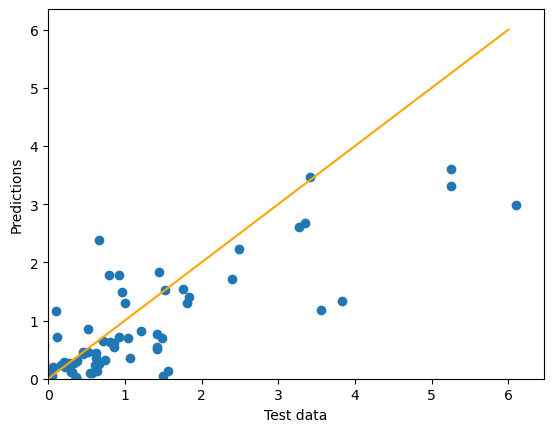

In [57]:
plt.plot(np.linspace(6, 0), np.linspace(6, 0), color='orange') 
plt.scatter(y_test_prueba, y_pred)
plt.xlabel('Test data')
plt.ylabel('Predictions')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.show()

In [59]:
best_model.save('kaggle.keras_final')

INFO:tensorflow:Assets written to: kaggle.keras_final\assets


INFO:tensorflow:Assets written to: kaggle.keras_final\assets


In [60]:
y_pred_k = best_model.predict(X_test, verbose=1)

10/10 [==============================] - 0s 841us/step


In [61]:
results=pd.DataFrame({'ID':test_set['ID'],'price':y_pred_k.reshape(-1)}) 
results

,ID,price
0,1473,3.488369
1,716,-0.570472
2,1360,0.492657
3,1522,0.084314
4,1570,-1.107755
...,...,...
315,1475,-0.372078
316,374,-0.064307
317,795,0.336633
318,888,-0.766408


In [62]:
results.to_csv("results_kaggle_final_lucas.csv",index=False)

# SE ENTRENA EL MEJOR MODELO CON TODO EL TRAINING SET

In [63]:
def build_model(layers, neurons_per_layer, activation, alpha, learning_rate, optimizer):
    model = Sequential()
 
    model.add(Dense(X_train_final.shape[1], activation=activation, input_shape=(X_train_final.shape[1],)))
    for k in neurons_per_layer:

        model.add(Dense(k, activation=activation,kernel_regularizer=regularizers.l1(l1=l1)))
        model.add(Dropout(0.2))
    model.add(Dense(1, activation="linear"))

    # Elegimos el optimizador,
    if optimizer == "adam":
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == "rms":
        opt=keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer =="adamw":
        opt=tf.keras.optimizers.AdamW(learning_rate=learning_rate,weight_decay=0.004,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False, clipnorm=None,clipvalue=None,global_clipnorm=None,use_ema=False,ema_momentum=0.99,ema_overwrite_frequency=None,jit_compile=True,name="AdamW")

    # Compilamos el modelo
    model.compile(loss="mse", optimizer=opt, metrics=["mse"])
    model.summary()
    return model

patience=40

In [64]:
X_train_t, X_val_t, y_train_t, y_val_t = train_test_split(X_train_final, y_train_final, test_size=0.2, random_state=42)



In [66]:
mm=metricas[f'Modelo{str(min_model.index.values[0])}']
mm

[0,
 [128, 64, 32],
 'relu',
 0.0001,
 0.001,
 'adamw',
 0.37160924077033997,
 0.29331088066101074]

In [67]:
patience=30
my_callbacks = [keras.callbacks.EarlyStopping(monitor="val_mse",min_delta=0,patience=patience,verbose=0,mode="auto",baseline=None,restore_best_weights=True,)]

In [68]:
best_model_t= build_model( mm[0], mm[1], mm[2], mm[3],mm[4], mm[5] )

Model: "sequential_163"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1098 (Dense)          (None, 23)                552       
                                                                 
 dense_1099 (Dense)          (None, 128)               3072      
                                                                 
 dropout_774 (Dropout)       (None, 128)               0         
                                                                 
 dense_1100 (Dense)          (None, 64)                8256      
                                                                 
 dropout_775 (Dropout)       (None, 64)                0         
                                                                 
 dense_1101 (Dense)          (None, 32)                2080      
                                                                 
 dropout_776 (Dropout)       (None, 32)             

In [69]:
best_model_t.fit(X_train_t, y_train_t, epochs=500, batch_size=125, validation_data=(X_val_t, y_val_t), callbacks=my_callbacks)

Epoch 1/500
9/9 [==============================] - 1s 18ms/step - loss: 2.0738 - mse: 0.8104 - val_loss: 2.2084 - val_mse: 0.9625
Epoch 2/500
9/9 [==============================] - 0s 6ms/step - loss: 1.8104 - mse: 0.5759 - val_loss: 1.8917 - val_mse: 0.6743
Epoch 3/500
9/9 [==============================] - 0s 6ms/step - loss: 1.7052 - mse: 0.4992 - val_loss: 1.7457 - val_mse: 0.5571
Epoch 4/500
9/9 [==============================] - 0s 6ms/step - loss: 1.6307 - mse: 0.4537 - val_loss: 1.6950 - val_mse: 0.5357
Epoch 5/500
9/9 [==============================] - 0s 6ms/step - loss: 1.5616 - mse: 0.4139 - val_loss: 1.6623 - val_mse: 0.5319
Epoch 6/500
9/9 [==============================] - 0s 6ms/step - loss: 1.4931 - mse: 0.3741 - val_loss: 1.5904 - val_mse: 0.4887
Epoch 7/500
9/9 [==============================] - 0s 5ms/step - loss: 1.4394 - mse: 0.3490 - val_loss: 1.5678 - val_mse: 0.4946
Epoch 8/500
9/9 [==============================] - 0s 5ms/step - loss: 1.4623 - mse: 0.4005 - va

In [70]:
best_model_t.save('kaggle_final_model_full_train.keras')

In [71]:
y_pred_k_t=best_model.predict(X_test, verbose=1)


10/10 [==============================] - 0s 594us/step


In [72]:
y_pred_k_t = y_scaler_final.inverse_transform(y_pred_k_t)

In [74]:
y_pred_k_t

array([[1840184.8 ],
       [ 351920.47],
       [ 741740.3 ],
       [ 592012.2 ],
       [ 154913.61],
       [ 451195.8 ],
       [ 377563.34],
       [ 592362.56],
       [ 759441.75],
       [ 397340.53],
       [ 526020.06],
       [ 662662.25],
       [ 394831.62],
       [ 460629.8 ],
       [ 526745.5 ],
       [ 680428.9 ],
       [ 401521.88],
       [ 319740.25],
       [ 390973.72],
       [ 697028.8 ],
       [ 562419.56],
       [ 416754.56],
       [ 465173.56],
       [ 278557.25],
       [ 439476.3 ],
       [ 420297.72],
       [ 330795.  ],
       [ 975535.8 ],
       [ 594967.6 ],
       [ 441033.12],
       [ 508279.3 ],
       [ 553395.56],
       [ 557132.3 ],
       [ 689646.7 ],
       [ 351468.44],
       [ 358036.34],
       [ 372692.1 ],
       [ 475694.62],
       [ 555402.44],
       [ 355022.56],
       [ 811317.94],
       [ 444715.03],
       [ 417456.56],
       [ 351273.72],
       [ 679955.25],
       [ 662771.4 ],
       [1063434.  ],
       [ 4448

In [76]:
y_pred_k_t.shape

(320, 1)

In [84]:
#ID_test

ID_test2 = np.array(ID_test)

In [89]:
# Transformar ID_test de dimension (320,) a (320,1)

ID_test2 = ID_test2.reshape(-1,1)

In [91]:
ID_test2.shape

(320, 1)

In [94]:
y_pred_k_t.shape

(320, 1)

In [95]:
ID_test_final = ID_test2.flatten()
y_pred_final = y_pred_k_t.flatten()

In [96]:
results=pd.DataFrame({'ID' : ID_test_final , 'price' : y_pred_final})
results

,ID,price
0,1473,1.840185e+06
1,716,3.519205e+05
2,1360,7.417403e+05
3,1522,5.920122e+05
4,1570,1.549136e+05
...,...,...
315,1475,4.246658e+05
316,374,5.375169e+05
317,795,6.845306e+05
318,888,2.800759e+05


In [97]:
results.to_csv("final_kaggle_lucas_Best_model.csv",index=False)

In [ ]:
# param_grid = {
#     'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 25)],
#     'batch_size': [32, 64, 128],
#     'alpha': [0.0001, 0.001, 0.01],
#     'solver': ['sgd', 'adam'],
#     'activation': ['relu', 'tanh'],
#     'learning_rate_init': [0.001, 0.01, 0.1]
# }

# # Crear el modelo de regresión neuronal
# model = MLPRegressor(max_iter=1000, random_state=42)

# # Crear el objeto GridSearchCV para la búsqueda de hiperparámetros
# grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)

In [ ]:
# grid_search.fit(X_train, y_train)
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# y_pred = best_model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error en conjunto de prueba: {mse}')